In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загружаем набор данных
data = pd.read_csv('task-3-dataset.csv')  # Предполагается, что файл reviews.csv с текстами и метками

# Разделяем данные на текстовые отзывы и метки
texts = data['отзывы'].values
labels = data['разметка'].values

# Разбиваем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {len(X_train)}")
print(f"Тестовая выборка: {len(X_test)}")


Обучающая выборка: 168
Тестовая выборка: 42


In [4]:

print(X_train)

['Для меня не хватает яркости, слишком большой'
 'он хорош! шустрый стильный, и что не мало важно камера просто отпад'
 'хорошая камера, долго держит зарядку, лучший телефон'
 'Очень доволен телефоном, но телефон не для всех и не всем по карману.'
 'Тормозит даже в браузере, про игры вообще молчу. Батарея вовсе не 6 000.'
 'Всего через 10 минут использования весь корпус телефона начинает очень сильно нагреваться.'
 'Первое впечатление отличное, надеюсь и дальше будет таким'
 'Достоинств много, я даже не буду перечислять' 'не верю, это всё обман'
 'очень слабый аккумулятор - еле хватает на день не очень интенсивного использования'
 'Для игр слабоват' 'телефон внешне очень красивый'
 'Использовала его примерно год. Реклама и постоянные уведомления - это просто кошмар. Через неделю после использования звук у динамика стал настолько глухим, что я практически не слышала собеседника. Периодически сам перезагружается.'
 'достойный аппарат с таким экраном'
 'Телефоном очень довольна, удобный, 

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Настройка токенизатора
max_words = 10000  # Максимальное количество уникальных слов
max_len = 100  # Максимальная длина последовательности

# Создаём токенизатор
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Преобразуем тексты в последовательности чисел
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг последовательностей, чтобы все имели одинаковую длину
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print(f"Размерность обучающего набора: {X_train_pad.shape}")
print(f"Размерность тестового набора: {X_test_pad.shape}")


Размерность обучающего набора: (168, 100)
Размерность тестового набора: (42, 100)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Параметры модели
embedding_dim = 128  # Размерность векторного представления слов

# Создаём модель
model = Sequential()

# Слой векторизации слов (embedding layer)
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

# LSTM слой
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Полносвязный слой для классификации
model.add(Dense(1, activation='sigmoid'))  # Выходная активация - sigmoid для бинарной классификации

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Строим модель
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Обучаем модель
history = model.fit(X_train_pad, y_train, epochs=15, batch_size=64, validation_data=(X_test_pad, y_test))

# Сохраняем модель
model.save('sentiment_model.h5')


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.4628 - loss: 0.6932 - val_accuracy: 0.6667 - val_loss: 0.6743
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.5619 - loss: 0.6815 - val_accuracy: 0.6667 - val_loss: 0.6593
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.5698 - loss: 0.6715 - val_accuracy: 0.6667 - val_loss: 0.6443
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.5474 - loss: 0.6625 - val_accuracy: 0.6667 - val_loss: 0.6329
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.5877 - loss: 0.6322 - val_accuracy: 0.6667 - val_loss: 0.6159
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.6744 - loss: 0.6094 - val_accuracy: 0.6667 - val_loss: 0.6045
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.8268 - loss: 0.5416 - val_accuracy: 0.7143 - val_loss: 0.5782
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.9115 - loss: 0.4695 - val_accuracy: 0.6905 - val_loss:

In [44]:
# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Тестовая точность: {accuracy * 100:.2f}%")

# Пример предсказания
sample_text = ["Ужасный товар! Не рекомендую"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

prediction = model.predict(sample_pad)
print("Положительный отзыв!" if prediction[0] > 0.5 else "Отрицательный отзыв!")
print(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7421 - loss: 0.4119
Тестовая точность: 73.81%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Отрицательный отзыв!
[[0.32812482]]


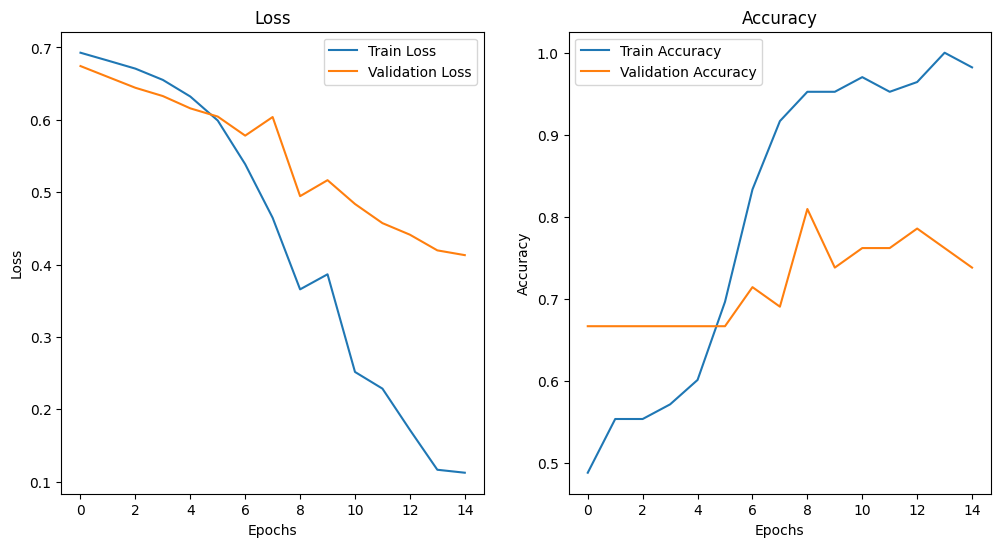

In [48]:
import matplotlib.pyplot as plt
history_dict = history.history

# График потерь
plt.figure(figsize=(12, 6))

# Потери на обучении
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Точность на обучении
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Показываем графики
plt.show()

In [46]:
#набор данных для проверки
data = pd.read_csv('test50.csv')  # Предполагается, что файл reviews.csv с текстами и метками

# Разделяем данные на текстовые отзывы и метки
texts = data['Отзывы'].values
labels = data['разметка'].values

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

X_test_seq = tokenizer.texts_to_sequences(X_test)

X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)




In [47]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(accuracy)
sample_seq = tokenizer.texts_to_sequences(texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

prediction = model.predict(sample_pad)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7000 - loss: 0.9709
0.699999988079071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
[[0.48837557]
 [0.25984725]
 [0.90573484]
 [0.9904669 ]
 [0.20286116]
 [0.3205164 ]
 [0.3159273 ]
 [0.43143165]
 [0.45190576]
 [0.16369383]
 [0.7878878 ]
 [0.44810554]
 [0.326074  ]
 [0.7466756 ]
 [0.2760526 ]
 [0.9119692 ]
 [0.56669754]
 [0.5812736 ]
 [0.6789079 ]
 [0.8566241 ]
 [0.43855655]
 [0.5434569 ]
 [0.7879609 ]
 [0.97930026]
 [0.17019592]
 [0.96049756]
 [0.9794592 ]
 [0.42705157]
 [0.98117137]
 [0.7514807 ]
 [0.13711117]
 [0.26219672]
 [0.95692277]
 [0.91928005]
 [0.17312732]
 [0.10556231]
 [0.8533408 ]
 [0.35715652]
 [0.8691644 ]
 [0.32322603]
 [0.9972849 ]
 [0.5688198 ]
 [0.95319015]
 [0.59973395]
 [0.9476915 ]
 [0.90346426]
 [0.6248669 ]
 [0.99106324]
 [0.38325912]
 [0.5630436 ]]
